# Homework

$\textbf{Made by Joseph Nicolay Ruiz Alvarez; ID 1001362404}$

Realize numerically gradient descent method on the "data.csv"
which represent some linear regression problem (fitting)  

Use following parameters:

    theta_1 = 10     # initial values of   
    theta_0 = 10     # y=theta_1*x + theta_0  
    alpha = 0.0001   # The learning Rate  
    epochs = 100     # The number of iterations  
    
After finding the optimal $\theta_0$ and $\theta_1$ that minimized the MSE function make four plots (on an array... using plt.subplots(2,2))

* plot 1 the final fitting line to the data and compare it with the scipy.optimize (lm) build-in function
* plot 2 time evolution of MSE vs number of iterations
* plot 3 time evolution of MAE vs number of iterations
* plot 4 time evolution of MAPE vs number of iterations



to store results of for example MAPE, you can   
create empty list: MAPE=[]  
then inside a loop: MAPE.append(calculated mape)

* play with $\alpha$ to see how the learning rate affects the optimization 
* Try with alpha=0.0007

## Solution to exercise

Let's define the parameter vector $\vec\theta$. After each iteration, let's update the parameter values $\vec{\theta} (\theta_{0},\theta_{1}$ as follows:

   taking, 
    $h_\theta(x_i)=\theta_1x_i+\theta_0$


$$\theta_0:=\theta_0 - \alpha \frac{d}{d\theta_0}J(\theta_0,\theta_1)$$
$$\theta_1:=\theta_1 - \alpha \frac{d}{d\theta_1}J(\theta_0,\theta_1)$$

finally,

$$\theta_0:=\theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}[ h_{\theta}(x_i) - y_i]$$
$$\theta_1:=\theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m}([ h_{\theta}(x_i) - y_i]*x_i)$$

$\textbf{NOTE}$: One Half Mean Squared Error function is considered in this code. 



### Implementation of the above code --- pseudocode:

In short, the code steps are on this way:


* initialize thetas with any seed value $\vec{\theta}_ {init} to be evaluated$

* calculate the hypothesis function : h_theta = theta_1*x + theta_0

* d_theta_0 = $-\frac{1}{m} \sum_{i=1}^{m}[ y_i - h_\theta]$
* d_theta_1 = $-\frac{1}{m} \sum_{i=1}^{m}([ y_i - h_\theta]*x_i)$

- remember that the x and y are vectors arrays of data

then  
* theta_0 = theta_0 - $\alpha$*d_theta_0
* theta_1 = theta_1 - $\alpha$*d_theta_1

* and update the hypothesis function with the new values for parameter vector

* Simultaneously compute and save

$$MSE = \frac{1}{2 m}\sum_{i=1}^{m}[y_i-h_\theta(x_i)]^2$$

$$MAE=\frac{1}{m}\sum_{i=1}^{m}|y_i-h_\theta(x_i)|$$

$$MAPE=\frac{100}{m}\sum_{i=1}^{m}|\frac{y_i-h_\theta(x_i)}{y_i}|$$


* iterative process, e.g., 100 times

In [1]:
#Importing useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Charging data arrays or train data set

data =  pd.read_csv('data.csv', header = None)


In [3]:
# Let's define some functions

# Function to generate parameters of the linear regression model, m & b.
def init_params():
    m = np.random.normal(scale=10)
    b = np.random.normal(scale=10)
    return m, b


##### NOTE: Agg the line for MAE & MAPE
def plot_graph(dataset, pred_line=None, losses=None, MAE=None, MAPE=None):
    
    plots = 4 if losses!=None else 1
    
    fig = plt.figure(figsize=(4 * plots, 4))
    x, y = dataset[0], dataset[1]
    ax1 = fig.add_subplot(1, plots, 1)
    ax1.scatter(x, y, alpha=0.8)                               # Plot the original set of datapoints
        
    if(pred_line != None):
        x_line, y_line, y_scipyfit = pred_line['x_line'], pred_line['y_line'], pred_line['scipy_fit']        
        ax1.plot(x_line, y_line, linewidth=2, markersize=12, color='red', alpha=0.8, label='Gradient method')      # Plot the randomly generated line
        ax1.plot(x_line, y_scipyfit, linewidth=2, markersize=12, color='green', alpha=0.8, label='LM (Scipy.optimize)')
        ax1.legend()
        ax1.set_title('Predicted Line on set of Datapoints')
    else:
        ax1.set_title('Plot of Datapoints generated')
   
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.grid(True)
    
    if(losses!=None or MAE!=None or MAPE!=None):
        ax2 = fig.add_subplot(1, plots, 2)
        ax2.plot(np.arange(len(losses)), losses, marker='o')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.set_title('Loss')
        plt.grid()
        
        ax3 = fig.add_subplot(1, plots, 3)
        ax3.plot(np.arange(len(MAE)), MAE, marker='o')
        ax3.set_xlabel('Epoch')
        ax3.set_ylabel('MAE')
        ax3.set_title('MAE')
        plt.grid()
        
        ax4 = fig.add_subplot(1, plots, 4)
        ax4.plot(np.arange(len(MAPE)), MAPE, marker='o')
        ax4.set_xlabel('Epoch')
        ax4.set_ylabel('MAPE')
        ax4.set_title('MAPE')
        plt.grid()

    plt.tight_layout(w_pad=2.0)
    plt.show()
    


def plot_pred_line(dataset, m, b,losses=None, MAE=None, MAPE=None):
    
    # Generate a set of datapoints on x for creating a line.
    # We shall consider the range of X_train for generating the line so that the line superposes the datapoints.
    x_line = np.linspace(np.min(dataset[0]), np.max(dataset[0]), 10)             
    
    # Calculate the corresponding y with the parameter values of m & b
    y_line = forward_prop(x_line,m,b)    
    y_scipyfit = forward_prop(x_line,parameters[0],parameters[1])
    
    plot_graph(dataset, pred_line={'x_line': x_line, 'y_line':y_line, 'scipy_fit':y_scipyfit}, losses=losses, MAE=MAE, MAPE=MAPE)
    
    return 



def forward_prop(X, m, b):
    y_pred = m * X + b
    return y_pred


def grad_desc(m, b, X_train, y_train, y_pred):
    dm = np.mean((y_pred - y_train) * X_train)
    db = np.mean(y_pred - y_train)
    return dm, db


def update_params(m, b, dm, db, l_r):
    m -= l_r * dm
    b -= l_r * db
    return m, b


def back_prop(X_train, y_train, y_pred, m, b, l_r):
    dm, db = grad_desc(m, b, X_train, y_train, y_pred)
    m, b = update_params(m, b, dm, db, l_r)
    return m, b

def compute_loss(y, y_pred):                 #MSE
    loss = 1 / 2 * np.mean((y_pred - y)**2)
    return loss

def compute_MAE(y, y_pred):
    mae = np.mean(abs(y_pred - y))
    return mae

def compute_MAPE(y, y_pred):
    mape = np.mean(abs((y_pred - y)/y))
    return mape

def scipy_fit(func, dataset, seed):

    opt, cov = curve_fit(func, dataset[0], dataset[1], seed, method='lm')
    return opt

    


In [4]:
#Conditions

theta_1 = 10     # initial values of   
theta_0 = 10     # y=theta_1*x + theta_0  
l_r = 0.0007   # The learning Rate  
epochs = 100     # The number of iterations

#Getting the fitting parameter by curve_fit
parameters = scipy_fit(forward_prop, data, [theta_1, theta_0])

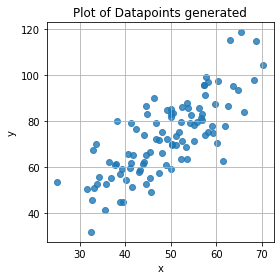

Epoch:  0
Loss/MSE = 94695.5821
MAE =  426.8484
MAPE = 6.0006


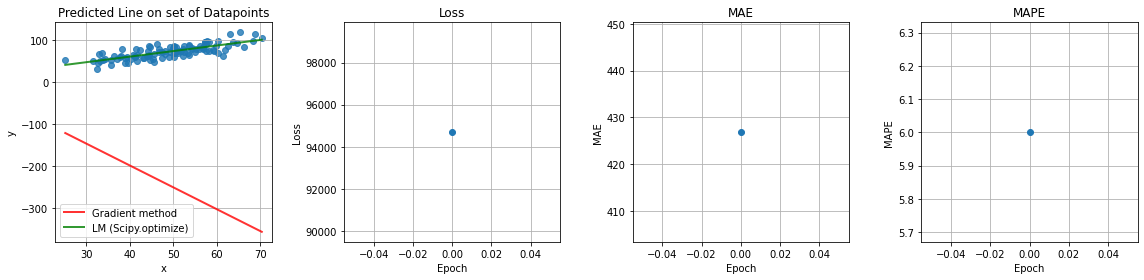

Epoch:  10
Loss/MSE = 313.1680
MAE =  22.4599
MAPE = 0.3381


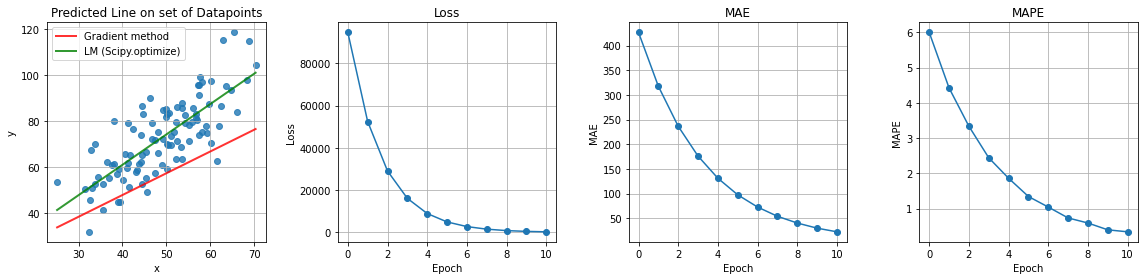

Epoch:  20
Loss/MSE = 55.8956
MAE =  8.4941
MAPE = 0.1261


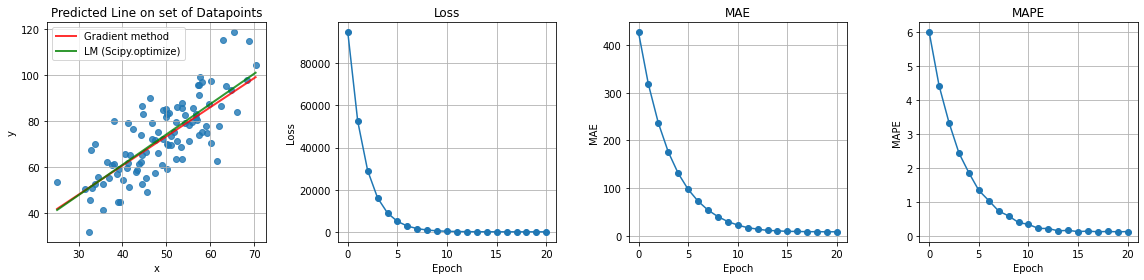

Epoch:  30
Loss/MSE = 55.1943
MAE =  8.3319
MAPE = 0.1219


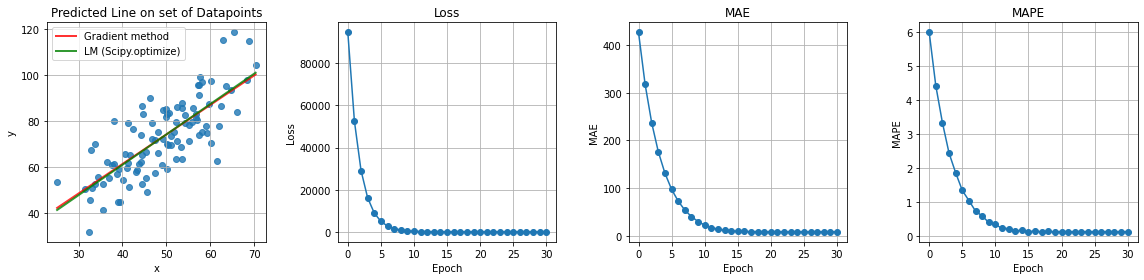

Epoch:  40
Loss/MSE = 55.1923
MAE =  8.3287
MAPE = 0.1218


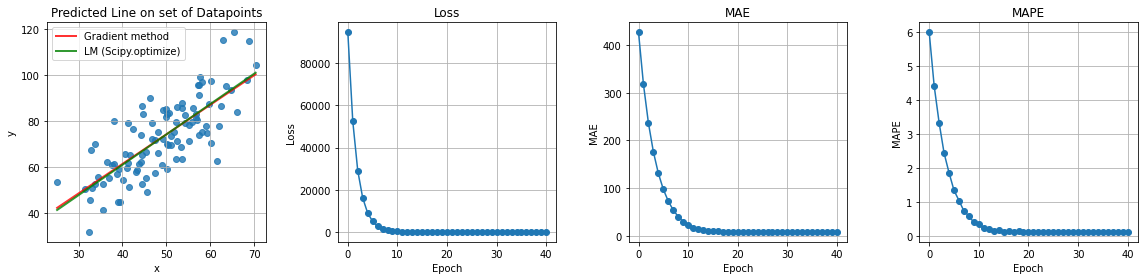

Epoch:  50
Loss/MSE = 55.1923
MAE =  8.3286
MAPE = 0.1218


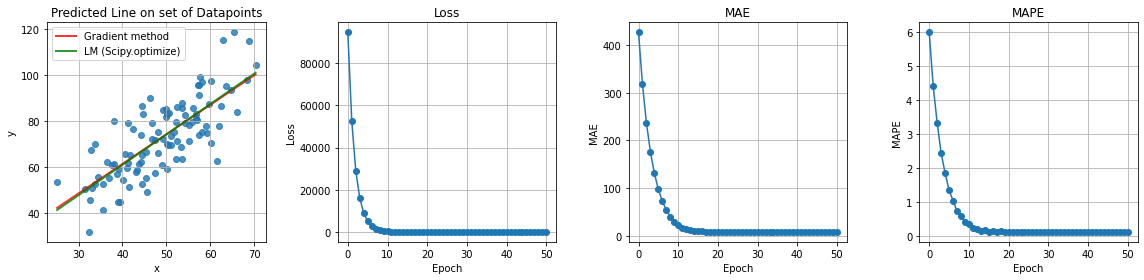

Epoch:  60
Loss/MSE = 55.1922
MAE =  8.3285
MAPE = 0.1218


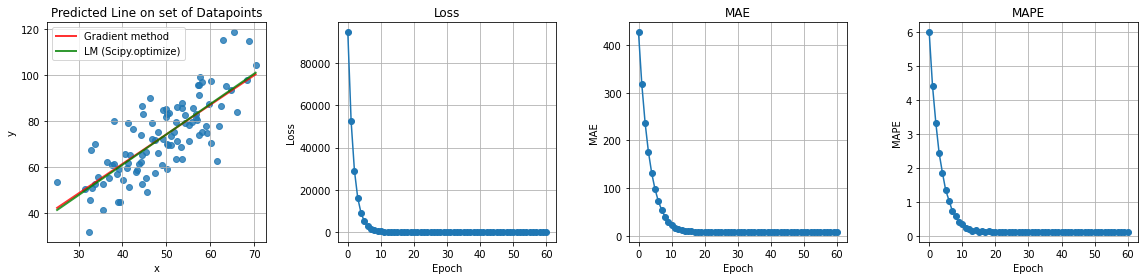

Epoch:  70
Loss/MSE = 55.1922
MAE =  8.3285
MAPE = 0.1218


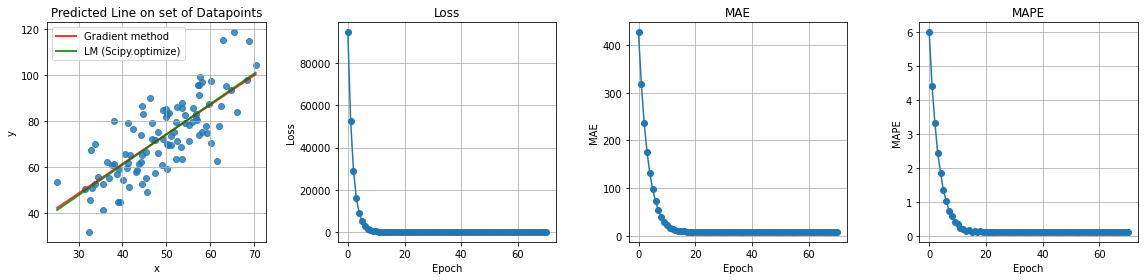

Epoch:  80
Loss/MSE = 55.1922
MAE =  8.3285
MAPE = 0.1218


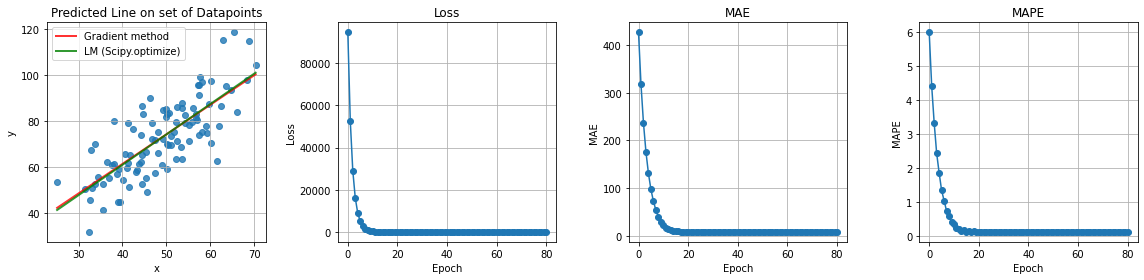

Epoch:  90
Loss/MSE = 55.1921
MAE =  8.3285
MAPE = 0.1218


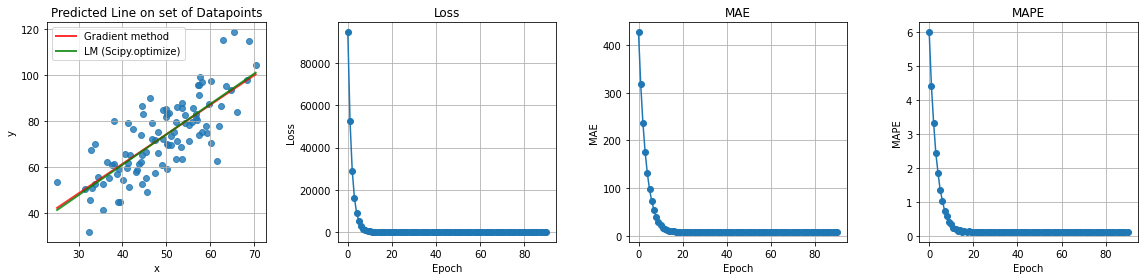

In [5]:
X = data[0]
Y = data[1]

plot_graph(data)

losses = []
MAE = []
MAPE = []

for i in range(epochs):
    y_pred = forward_prop(X, theta_1, theta_0)
    
    loss = compute_loss(Y, y_pred)
    mae = compute_MAE(Y, y_pred)
    mape = compute_MAPE(Y, y_pred)
    
    MAE.append(mae)
    MAPE.append(mape)
    losses.append(loss)
    
    theta_1, theta_0 = back_prop(X, Y, y_pred, theta_1, theta_0, l_r)
    
    if(i%10==0):
        print('Epoch: ', i)
        print('Loss/MSE = {:.4f}'.format(loss))
        print('MAE =  {:.4f}'.format(mae))
        print('MAPE = {:.4f}'.format(mape))
        plot_pred_line(data, theta_1, theta_0, losses, MAE, MAPE)

del losses[:]
del MAE[:]
del MAPE[:]